In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

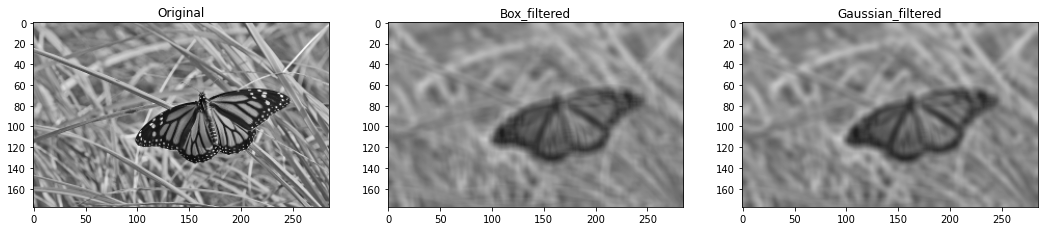

In [56]:
#Q1

img = cv.imread(r'butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None

k_size = 9
sigma = 4
box_kernel = 1./81*np.ones((9,9))
avg_img = cv.filter2D(img, -1, box_kernel)

gau_img = cv.GaussianBlur(img, (k_size, k_size), sigma)

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(avg_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Box_filtered')
ax[2].imshow(gau_img, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gaussian_filtered')
plt.show()

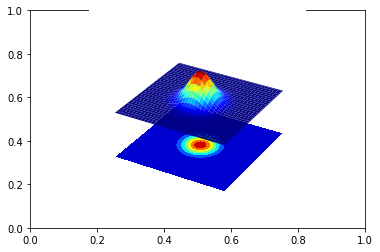

In [57]:
#Q2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

step = 0.1
X= np.arange(-5,5+step, step)
Y = np.arange(-5,5+step, step)
XX, YY = np.meshgrid(X, Y)
sigma =1.
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX, YY, g, cmap=cm.jet)

cset = ax.contourf(XX, YY, g, zdir='z', offset=np.min(g) - 1.5, cmap=cm.jet)

ax.set_zlim(np.min(g) -2, np.max(g))

plt.axis('off')
plt.show()



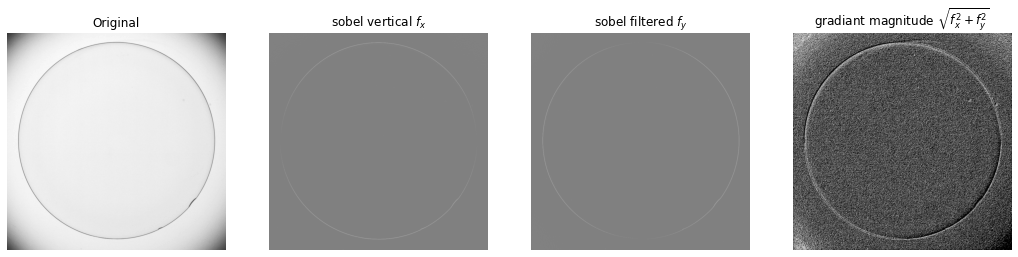

In [58]:
#Q3

img = cv.imread(r'contact_lens.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
img_x = cv.filter2D(img, -1, sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
img_h = cv.filter2D(img, -1, sobel_h)

grad_img = np.sqrt(img_x**2 + img_h**2)

fig, ax = plt.subplots(1,4, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('sobel vertical $f_x$')
ax[2].imshow(img_h, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title('sobel filtered $f_y$')
ax[3].imshow(grad_img, cmap='gray')
ax[3].set_title('gradiant magnitude $\sqrt{f_x^2 + f_y^2}$')
for i in range(4):
    ax[i].axis('off')
plt.show()

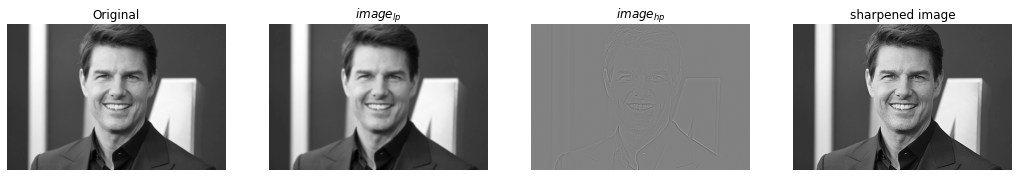

In [59]:
#Q4

img = cv.imread(r'tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma =2
gaussian1d = cv.getGaussianKernel(5, sigma)
img_lp = cv.sepFilter2D(img, -1, gaussian1d, gaussian1d)
img_hp = img - img_lp
img_sharpened = cv.addWeighted(img, 1.0, img_hp, 1.5, 0)

fig, ax = plt.subplots(1,4, figsize=(18,6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_lp, cmap='gray')
ax[1].set_title('$image_{lp}$')
ax[2].imshow(img_hp, cmap='gray')
ax[2].set_title('$image_{hp}$')
ax[3].imshow(img_sharpened, cmap='gray',vmin=0, vmax=255)
ax[3].set_title('sharpened image')
for i in range(4):
    ax[i].axis('off')
plt.show()